In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp

In [28]:
df = pd.read_csv('Madrid_Cleaned_Data.csv')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17452 entries, 0 to 17451
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17452 non-null  int64  
 1   district           17452 non-null  object 
 2   sq_mt_built        17452 non-null  float64
 3   n_rooms            17452 non-null  int64  
 4   n_bathrooms        17452 non-null  int64  
 5   buy_price          17452 non-null  int64  
 6   buy_price_by_area  17452 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.5+ KB


# Univariate Analysis

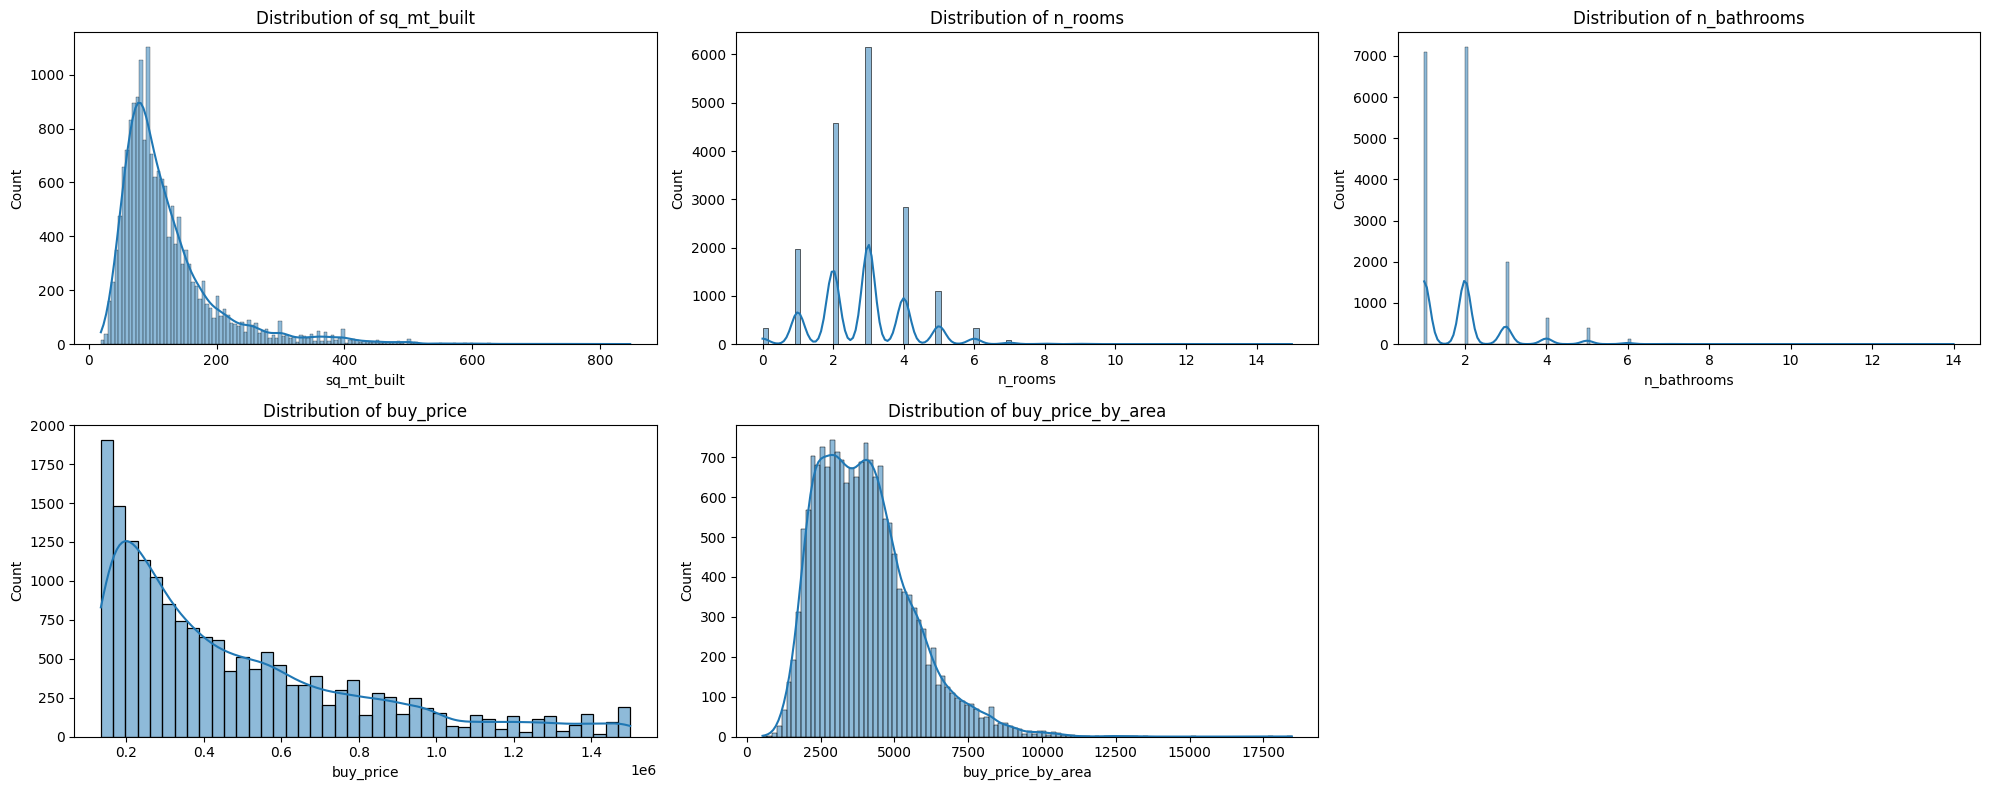

In [30]:
# Shape of Numerical Data 
plt.figure(figsize = (20,8))
for e ,i in enumerate(df.columns[2:]):
    plt.subplot(2, 3, e+1)
    plt.title('Distribution of ' + i)
    sns.histplot(df[i], kde=True)
    plt.tight_layout();

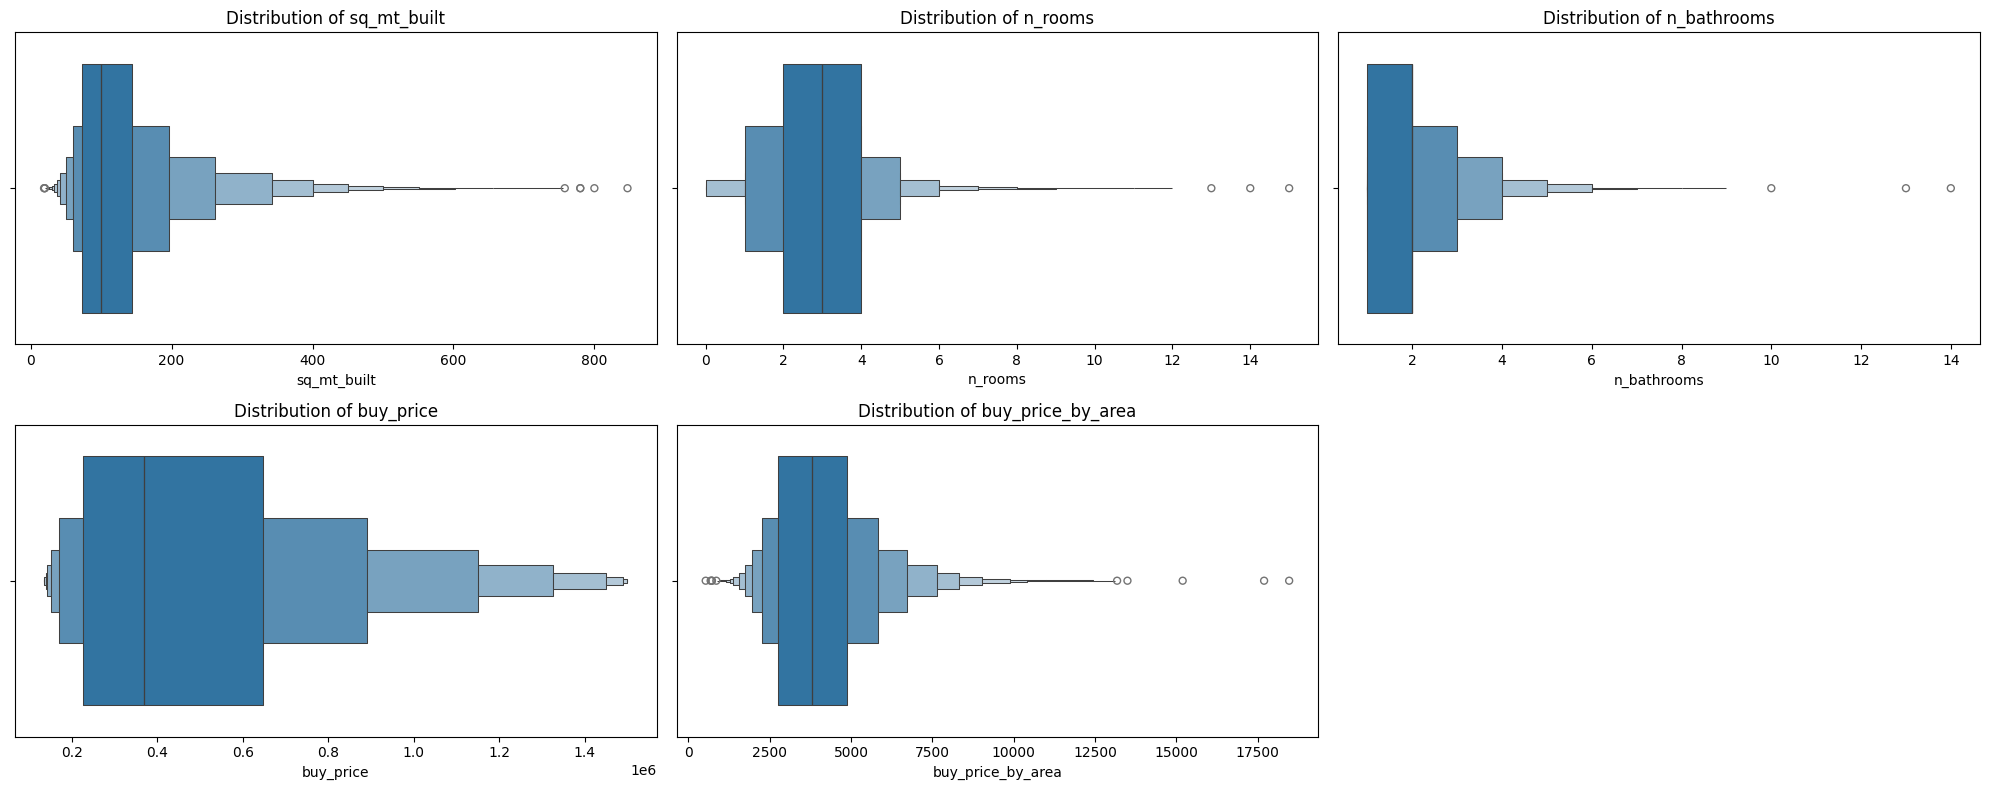

In [31]:
# Shape of Numerical Data 
plt.figure(figsize = (20,8))
for e ,i in enumerate(df.columns[2:]):
    plt.subplot(2, 3, e+1)
    plt.title('Distribution of ' + i)
    sns.boxenplot(x = df[i])
    plt.tight_layout();

In [32]:
exp.bar(df.district.value_counts(), title= 'Distribution of District in Madrid ')

# Bivariate Analysis

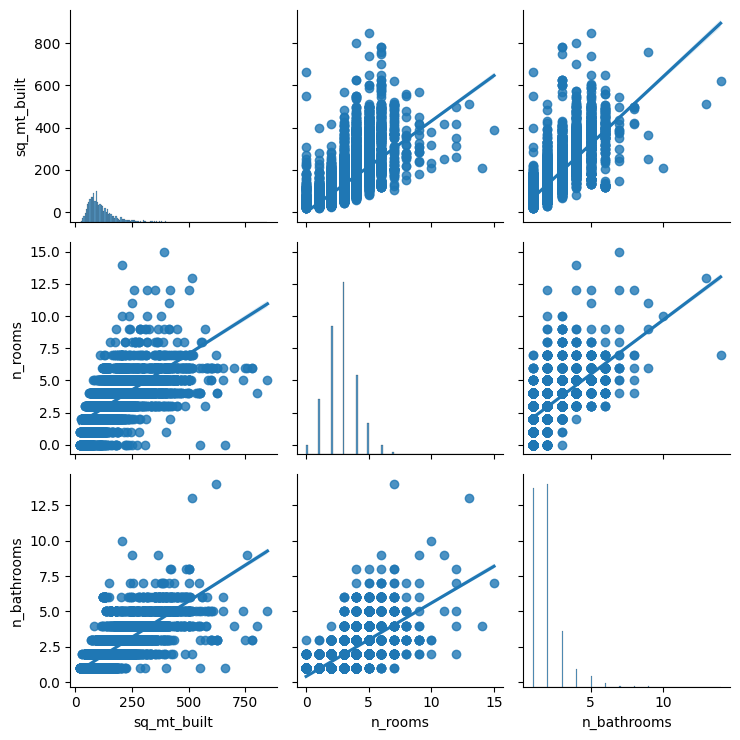

In [33]:
# apply correlation coeffcient to show relationship between feature and target

corr = df[['sq_mt_built', 'n_rooms', 'n_bathrooms']]

sns.pairplot(corr , kind= 'reg')
plt.tight_layout()


Text(0.5, 1.0, 'Corrleation Coeffcient between Numerical columns')

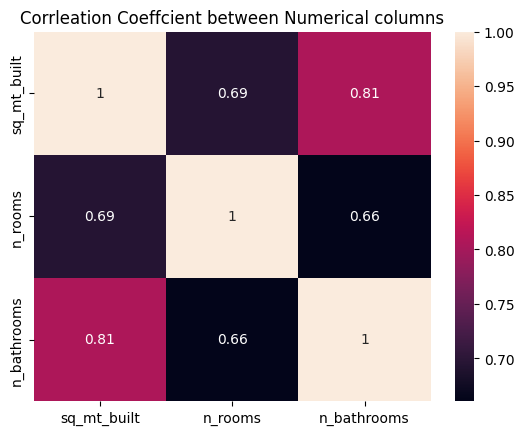

In [34]:
sns.heatmap(corr.corr(), annot=True)
plt.title('Corrleation Coeffcient between Numerical columns')

Text(0, 0.5, 'Buy Price')

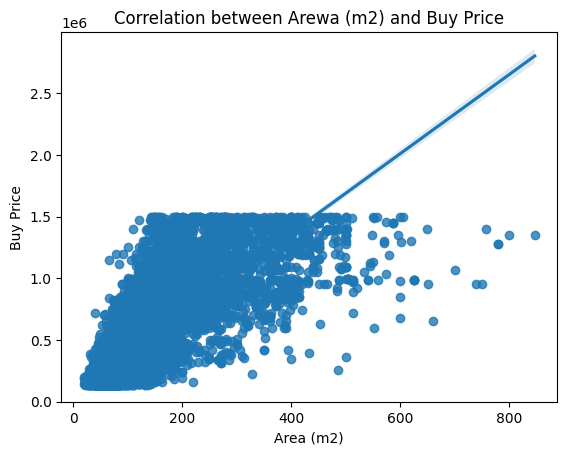

In [35]:
sns.regplot(data= df, x = 'sq_mt_built', y = 'buy_price')
plt.title('Correlation between Arewa (m2) and Buy Price')
plt.xlabel('Area (m2)')
plt.ylabel('Buy Price')

# Location or Size : what influences house prices in madrid ???

<Axes: title={'center': 'Mean Price by District'}, xlabel='District', ylabel='Buy Price'>

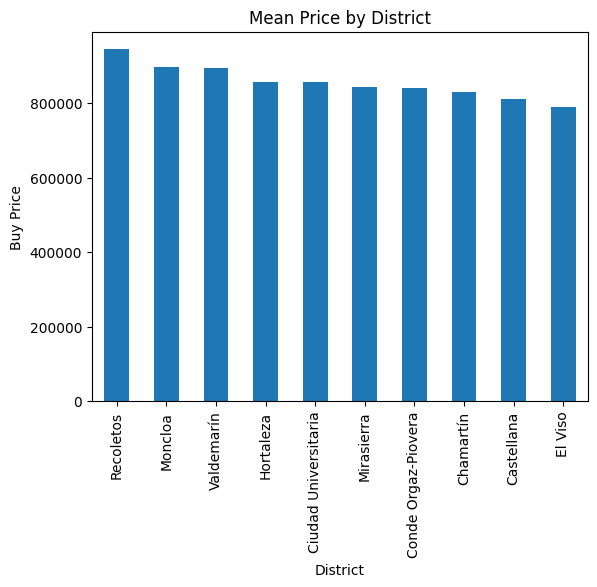

In [ ]:
mean_price = df.groupby('district')['buy_price'].mean().round(2).sort_values(ascending=False)
#Top 10 district by Buy Price in Madrid
mean_price.head(10).plot(kind='bar', xlabel= 'District', ylabel= 'Buy Price', title= 'Mean Price by District')

<Axes: title={'center': 'Mean Price by District'}, xlabel='District', ylabel='Buy Price by Area'>

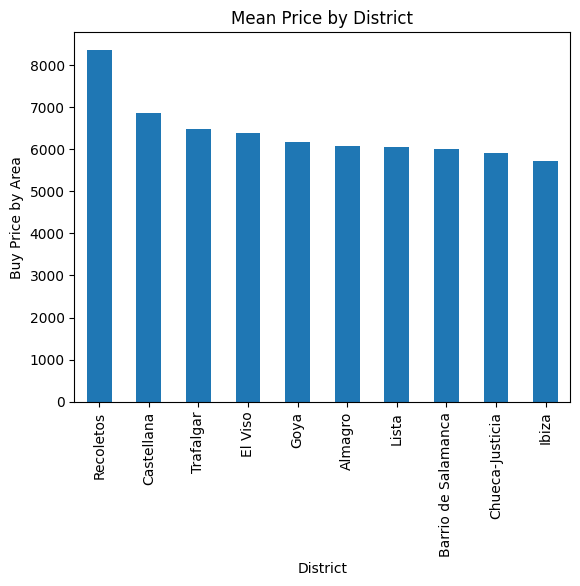

In [39]:
mean_price = df.groupby('district')['buy_price_by_area'].mean().round(2).sort_values(ascending=False)
#Top 10 district by Buy Price by Area in Madrid
mean_price.head(10).plot(kind='bar', xlabel= 'District', ylabel= 'Buy Price by Area', title= 'Mean Price by District')

In [43]:
reco = df.query('district == "Recoletos"')
reco.sample(10)

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
15853,1838,Recoletos,142.0,3,2,1220000,8592
15363,2518,Recoletos,84.0,2,2,730000,8690
15573,2230,Recoletos,126.0,2,3,825000,6548
15424,2441,Recoletos,176.0,3,3,1460000,8295
15863,1827,Recoletos,87.0,2,1,725000,8333
16003,1625,Recoletos,150.0,3,3,1460000,9733
15285,2622,Recoletos,127.0,2,2,990000,7795
15377,2501,Recoletos,75.0,2,2,750000,10000
15831,1864,Recoletos,81.0,2,1,510000,6296
15353,2530,Recoletos,60.0,1,1,620000,10333


In [45]:
# Using  Linear Regression Model to apply inferntial Statistics analyzing

import statsmodels.api as sm
reco['intercept'] = 1 
lm = sm.OLS(reco['buy_price'], reco[['intercept','sq_mt_built']])
result = lm.fit()
result.summary()

C:\Users\abdel\AppData\Local\Temp\ipykernel_7816\3609092129.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     72.05
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.64e-10
Time:                        16:22:27   Log-Likelihood:                -545.25
No. Observations:                  40   AIC:                             1094.
Df Residuals:                      38   BIC:                             1098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.525e+05   9.89e+04      1.543      0.131   -4.76e+04    3.53e+05
sq_mt_built  6843.1589    806.219      8.488      0.000    5211.054    8475.263
==============================================================================
Omnibus:                       10.228   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.615
Skew:                          -0.863   Prob(JB):                      0.00495
Kurtosis:                       4.840   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
reco.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,intercept
15272,2640,Recoletos,114.0,4,1,750000,6579,1
15278,2632,Recoletos,187.0,3,3,1450000,7754,1
15285,2622,Recoletos,127.0,2,2,990000,7795,1
15286,2620,Recoletos,92.0,2,1,378000,4109,1
15292,2602,Recoletos,45.0,1,1,399000,8867,1


Text(0.5, 1.0, 'Corrleation Coeffcient between Numerical columns')

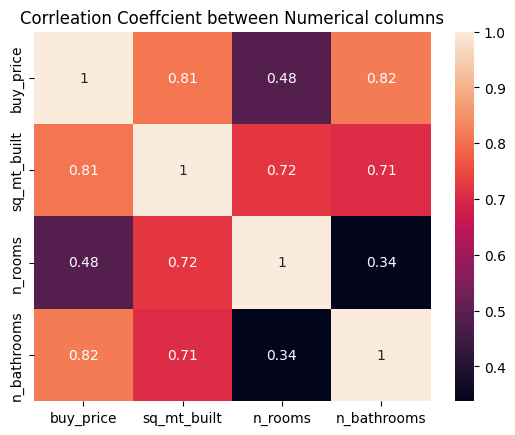

In [47]:
# Using  MultiLinear Regression Model to apply inferntial Statistics analyzing with quantitative data

corr = reco[['buy_price','sq_mt_built', 'n_rooms', 'n_bathrooms']]
sns.heatmap(corr.corr(), annot=True)
plt.title('Corrleation Coeffcient between Numerical columns')

In [49]:
lm = sm.OLS(reco['buy_price'], reco[['intercept','sq_mt_built', 'n_bathrooms']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     63.98
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           9.77e-13
Time:                        18:36:21   Log-Likelihood:                -536.61
No. Observations:                  40   AIC:                             1079.
Df Residuals:                      37   BIC:                             1084.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.212e+05    8.1e+04      1.496      0.143    -4.3e+04    2.85e+05
sq_mt_built  3895.8937    932.012      4.180      0.000    2007.457    5784.330
n_bathrooms   1.96e+05   4.39e+04      4.468      0.000    1.07e+05    2.85e+05
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.372
Skew:                          -0.192   Prob(JB):                        0.830
Kurtosis:                       2.724   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""